In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
import pandas as pd
data = pd.read_csv('/content/gdrive/MyDrive/Data Mining/Lab Session 3/Market_Basket_Optimisation.csv')

In [3]:
data.head(10)

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,whole wheat pasta,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,soup,light cream,shallot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,frozen vegetables,spaghetti,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,eggs,pet food,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Data NaN, Null dan 0 didalam kasus asosiasi bukanlah sebuah missing value atau noise yang harus dihilangkan atau diubah, tetapi perlu dilakukan pengkodean untuk mendapatkan data transaksi yang akan dicari asosiasinya

In [4]:
items = (data['shrimp'].unique())
items

array(['burgers', 'chutney', 'turkey', 'mineral water', 'low fat yogurt',
       'whole wheat pasta', 'soup', 'frozen vegetables', 'french fries',
       'eggs', 'cookies', 'spaghetti', 'shrimp', 'meatballs', 'red wine',
       'rice', 'parmesan cheese', 'ground beef', 'sparkling water',
       'herb & pepper', 'pickles', 'energy bar', 'fresh tuna', 'escalope',
       'avocado', 'tomato sauce', 'clothes accessories', 'energy drink',
       'chocolate', 'grated cheese', 'yogurt cake', 'mint', 'asparagus',
       'champagne', 'ham', 'muffins', 'french wine', 'chicken', 'pasta',
       'tomatoes', 'pancakes', 'frozen smoothie', 'carrots', 'yams',
       'shallot', 'butter', 'light mayo', 'pepper', 'candy bars',
       'cooking oil', 'milk', 'green tea', 'bug spray', 'oil',
       'olive oil', 'salmon', 'cake', 'almonds', 'salt', 'strong cheese',
       'hot dogs', 'pet food', 'whole wheat rice', 'antioxydant juice',
       'honey', 'sandwich', 'salad', 'magazines', 'protein bar',
       '

In [5]:
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

In [6]:
#Encode the itemset
itemset = set(items)
encoded_vals = []
for index, row in data.iterrows():
    rowset = set(row) 
    labels = {}
    uncommons = list(itemset - rowset)
    commons = list(itemset.intersection(rowset))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)
encoded_vals[0]
ohe_data = pd.DataFrame(encoded_vals)

In [7]:
ohe_data

,grated cheese,burger sauce,bramble,parmesan cheese,shampoo,ground beef,brownies,pickles,hot dogs,barbecue sauce,chicken,chocolate,sandwich,chutney,energy bar,fresh bread,toothpaste,honey,chili,cauliflower,french fries,frozen vegetables,salt,mint green tea,frozen smoothie,milk,antioxydant juice,shrimp,french wine,chocolate bread,clothes accessories,spinach,flax seed,cereals,extra dark chocolate,salmon,ketchup,champagne,pet food,avocado,...,whole wheat pasta,bug spray,salad,fromage blanc,pancakes,sparkling water,green tea,low fat yogurt,fresh tuna,light cream,melons,green beans,oatmeal,energy drink,cottage cheese,eggplant,carrots,cookies,dessert wine,mayonnaise,whole wheat rice,mushroom cream sauce,rice,cream,tomatoes,turkey,vegetables mix,cooking oil,green grapes,cake,tomato juice,mashed potato,candy bars,asparagus,escalope,black tea,whole weat flour,burgers,meatballs,eggs
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7496,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
7497,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7498,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [8]:
freq_items = apriori(ohe_data, min_support= 0.02, use_colnames=True)

In [9]:
freq_items

,support,itemsets
0,0.052400,(grated cheese)
1,0.098267,(ground beef)
2,0.033733,(brownies)
3,0.032400,(hot dogs)
4,0.060000,(chicken)
...,...,...
99,0.021467,"(burgers, spaghetti)"
100,0.036533,"(spaghetti, eggs)"
101,0.021733,"(pancakes, eggs)"
102,0.025467,"(green tea, eggs)"


In [15]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.3)

In [11]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ground beef),(mineral water),0.098267,0.238267,0.040933,0.416554,1.748266,0.017520,1.305576
1,(ground beef),(spaghetti),0.098267,0.174133,0.039200,0.398915,2.290857,0.022088,1.373959
2,(chicken),(mineral water),0.060000,0.238267,0.022800,0.380000,1.594852,0.008504,1.228602
3,(chocolate),(mineral water),0.163867,0.238267,0.052667,0.321400,1.348907,0.013623,1.122506
4,(frozen vegetables),(mineral water),0.095333,0.238267,0.035733,0.374825,1.573133,0.013019,1.218433
5,(frozen smoothie),(mineral water),0.063200,0.238267,0.020133,0.318565,1.337012,0.005075,1.117838
6,(milk),(mineral water),0.129600,0.238267,0.048000,0.370370,1.554436,0.017121,1.209812
7,(shrimp),(mineral water),0.071333,0.238267,0.023467,0.328972,1.380688,0.006470,1.135174
8,(olive oil),(mineral water),0.065733,0.238267,0.027467,0.417850,1.753707,0.011805,1.308483
9,(olive oil),(spaghetti),0.065733,0.174133,0.022933,0.348884,2.003547,0.011487,1.268387


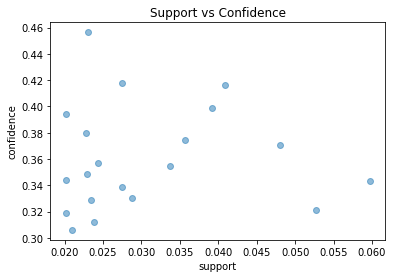

In [12]:
#support vs confidence
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

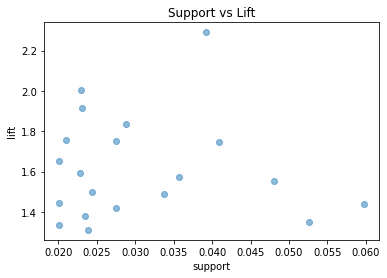

In [13]:
#support vs lift
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

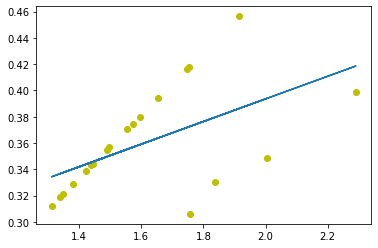

In [14]:
#lift vs confidence
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
 fit_fn(rules['lift']))